In [1]:
using GeometricIntegrators
using GeometricIntegrators.Integrators.SPARK

In [2]:
using Plots

In [3]:
const Δt = 0.1
const nt = 1000
;

In [4]:
set_config(:nls_atol, 8eps())
set_config(:nls_rtol, 2eps())
set_config(:nls_stol_break, Inf)
;

In [5]:
V(x₁,x₂) = (x₁^2-x₂^2)^2/2

V (generic function with 1 method)

In [6]:
hamiltonian(t,q,p,k) = p[1]^2/2 + p[2]^2/2 + k * V(q[1],q[2])

hamiltonian (generic function with 1 method)

In [7]:
function ϕ(t,q,p,ϕ,k,R)
    ϕ[1] = R - p[1]^2/2 - p[2]^2/2 - k * q[1]^2/2 - k * q[2]^2/2
#    ϕ[1] = R^2 - (p[1] + p[2])^2/2 - k * (q[1] + q[2])^2/2
    ϕ[2] = p[2]
end

ϕ (generic function with 1 method)

In [8]:
function v(t,q,p,v)
    v[1] = p[1]
    v[2] = p[2]
end

v (generic function with 1 method)

In [9]:
function f(t,q,p,f,k)
    f[1] = -2*k*q[1]*(q[1]^2-q[2]^2)
    f[2] = +2*k*q[2]*(q[1]^2-q[2]^2)
end

f (generic function with 1 method)

In [10]:
function u(t,q,p,λ,u)
    u[1] = + p[1] * λ[1]
    u[2] = + p[2] * λ[1] + λ[2]
#    u[1] = + (p[1] + p[2]) * λ[1]
#    u[2] = + (p[1] + p[2]) * λ[1]
end

u (generic function with 1 method)

In [11]:
function g(t,q,p,λ,g,k)
    g[1] = - k * q[1] * λ[1]
    g[2] = - k * q[2] * λ[1]
#    g[1] = - k * (q[1] + q[2]) * λ[1]
#    g[2] = - k * (q[1] + q[2]) * λ[1]
end

g (generic function with 1 method)

In [12]:
function compute_energy_error(t, q::DataSeries{T}, p::DataSeries{T}) where {T}
    h = SDataSeries(T, q.nt)
    e = SDataSeries(T, q.nt)

    for i in axes(q,2)
        h[i] = hamiltonian(t[i], q[:,i], p[:,i])
        e[i] = (h[i] - h[0]) / h[0]
    end

    (h, e)
end

compute_energy_error (generic function with 1 method)

In [13]:
#const R  = 2.0
const k  = 1.0
q₀ = [1.0, 0.0]
p₀ = [0.0, sqrt(3.0)]
#p₀ = [0.0, sqrt(R^2 - k * q₀[1]^2 - k * q₀[2]^2)]
λ₀ = [0.0,0.0]
R  = p₀[1]^2/2 + p₀[2]^2/2 + k * q₀[1]^2/2 + k * q₀[2]^2/2

1.9999999999999998

In [14]:
hamiltonian(t,q,p) = hamiltonian(t,q,p,k)
ϕ(t,q,p,z) = ϕ(t,q,p,z,k,R)
f(t,q,p,z) = f(t,q,p,z,k)
g(t,q,p,λ,z) = g(t,q,p,z,λ,k)

g (generic function with 2 methods)

In [15]:
ode = PODE(v, f, q₀, p₀)
int = IntegratorIPRK(ode, TableauIPRK(:GLRK1, 1, getCoefficientsGLRK(1)), Δt)
sol = Solution(ode, Δt, nt)
integrate!(int, sol)
;

    i=10000,   rₐ=6.48370246e-14,   rᵣ=6.87433353e-16,   rₛ=1.60302341e-14
    i=10000,   rₐ=3.90798505e-14,   rᵣ=7.87687235e-16,   rₛ=3.37051685e-15
    i=10000,   rₐ=8.61533067e-14,   rᵣ=7.21288872e-16,   rₛ=7.85749408e-15
    i=10000,   rₐ=3.01980663e-14,   rᵣ=1.01470752e-15,   rₛ=3.11319965e-15
    i=10000,   rₐ=8.88178420e-14,   rᵣ=7.03146473e-16,   rₛ=8.36573156e-15
    i=10000,   rₐ=4.26325641e-14,   rᵣ=8.50751068e-16,   rₛ=3.01059701e-15
    i=10000,   rₐ=5.15143483e-14,   rᵣ=1.73282692e-15,   rₛ=1.59350965e-15
    i=10000,   rₐ=1.06581410e-14,   rᵣ=6.56198438e-16,   rₛ=1.61433750e-15
    i=10000,   rₐ=2.48689958e-14,   rᵣ=1.57081109e-15,   rₛ=3.10296274e-15
    i=10000,   rₐ=2.48689958e-14,   rᵣ=1.96121459e-15,   rₛ=3.44306730e-15
    i=10000,   rₐ=3.46389584e-14,   rᵣ=3.15313755e-15,   rₛ=5.54400591e-15
    i=10000,   rₐ=8.88178420e-14,   rᵣ=1.43362517e-15,   rₛ=5.70578608e-15
    i=10000,   rₐ=4.35207426e-14,   rᵣ=1.01791263e-15,   rₛ=5.40669948e-15
    i=10000,   rₐ=4.44089

In [16]:
H, ΔH = compute_energy_error(sol.t, sol.q, sol.p);

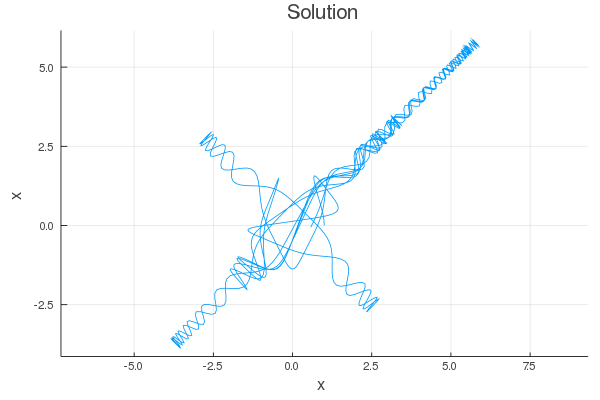

In [17]:
plot(sol.q[1,:], sol.q[2,:], legend=:none, xlab="x₁", ylab="x₂", title="Solution", aspectratio=1, fmt=:png)

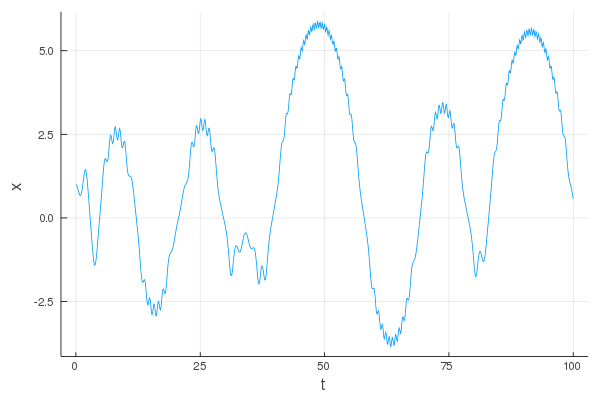

In [18]:
plot(sol.t[:], sol.q[1,:], legend=:none, xlab="t", ylab="x₁",fmt=:png)

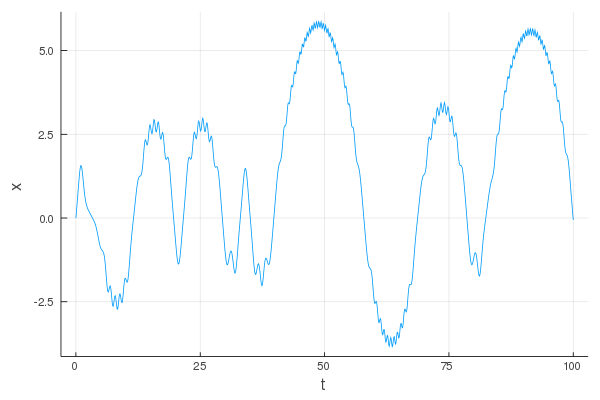

In [19]:
plot(sol.t[:], sol.q[2,:], legend=:none, xlab="t", ylab="x₁",fmt=:png)

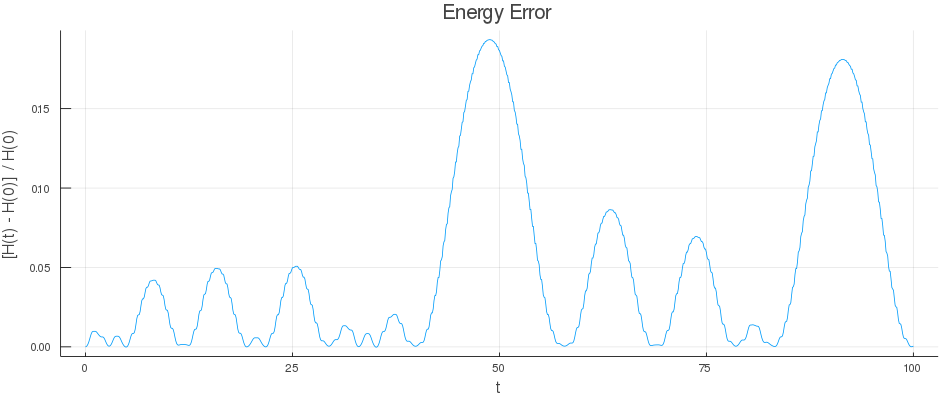

In [20]:
plot(sol.t, ΔH, legend=:none, xlab="t", ylab="[H(t) - H(0)] / H(0)", title="Energy Error", size=(950, 400), fmt=:png)

In [21]:
dae = PDAE(v, f, u, g, ϕ, q₀, p₀, λ₀)
int = IntegratorHPARK(dae, getTableauHPARKGLRK(1), Δt)
sol = Solution(dae, Δt, nt)
integrate!(int, sol)
;

    i=10000,   rₐ=           NaN,   rᵣ=           NaN,   rₛ=           NaN


ErrorException: Detected NaN